In [15]:
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('../data/exercise_train.tsv', sep='\t')
test = pd.read_csv('../data/exercise_test.tsv', sep='\t')
train.head()

,productId,gender,description,imageURL1,imageURL2,imageURL3,imageURL4,name,productType,pattern,productIdentifier
0,1026288,Women,Lightweight dress by ASOS CURVE;Embroidery and...,images.asos-media.com/products/asos-curve-embe...,images.asos-media.com/products/asos-curve-embe...,images.asos-media.com/products/asos-curve-embe...,images.asos-media.com/products/asos-curve-embe...,ASOS CURVE Embellished Neck Dress,Dresses,Embellished,23b469431f1ef587a931d7811a6aa914
1,7601668,Women,Lightly-textured stretch fabric;Leopard print;...,images.asos-media.com/products/asos-mini-dress...,images.asos-media.com/products/asos-mini-dress...,images.asos-media.com/products/asos-mini-dress...,images.asos-media.com/products/asos-mini-dress...,ASOS Mini Dress in Leopard Print With Frill Wa...,Dresses,Animal,133353816a459ef91d87fdee335f3c36
2,7550376,Women,Cotton-rich fabric;Contains stretch for comfor...,images.asos-media.com/products/h-by-henry-holl...,images.asos-media.com/products/h-by-henry-holl...,images.asos-media.com/products/h-by-henry-holl...,images.asos-media.com/products/h-by-henry-holl...,H! By Henry Holland Zebra Print Ruffle Dress,Dresses,Animal,676004bfc416bcb360702352b0f34c70
3,4519370,Women,"Lightweight, woven fabric;Boat neckline;Box pl...",images.asos-media.com/products/asos-reclaimed-...,images.asos-media.com/products/asos-reclaimed-...,images.asos-media.com/products/asos-reclaimed-...,images.asos-media.com/products/asos-reclaimed-...,ASOS Reclaimed Vintage Smudge Floral Midi Dress,Dresses,Floral,f9db7e1b620236c58ef0d8cb92f14abb
4,6436058,Women,Woven fabric;Bandeau neckline;Off-shoulder des...,images.asos-media.com/products/asos-off-the-sh...,images.asos-media.com/products/asos-off-the-sh...,images.asos-media.com/products/asos-off-the-sh...,images.asos-media.com/products/asos-off-the-sh...,ASOS Off The Shoulder Midi Prom Dress In Brig...,Dresses,Floral,cbde47b8c6b84803516b3285bfcbd4f3


In [12]:
print(f'Unique Identifiers: {train.productIdentifier.nunique()}\n')
print(f'Unique IDs: {train.productId.nunique()}\n')
train.info()

Unique Identifiers: 3049

Unique IDs: 3049

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3049 entries, 0 to 3048
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   productId          3049 non-null   int64 
 1   gender             3049 non-null   object
 2   description        3049 non-null   object
 3   imageURL1          3049 non-null   object
 4   imageURL2          3049 non-null   object
 5   imageURL3          3049 non-null   object
 6   imageURL4          3049 non-null   object
 7   name               3049 non-null   object
 8   productType        3049 non-null   object
 9   pattern            3049 non-null   object
 10  productIdentifier  3049 non-null   object
dtypes: int64(1), object(10)
memory usage: 262.1+ KB


- productId and productIdentifier are both unique IDs, use the former given the smaller datatype ignore the latter


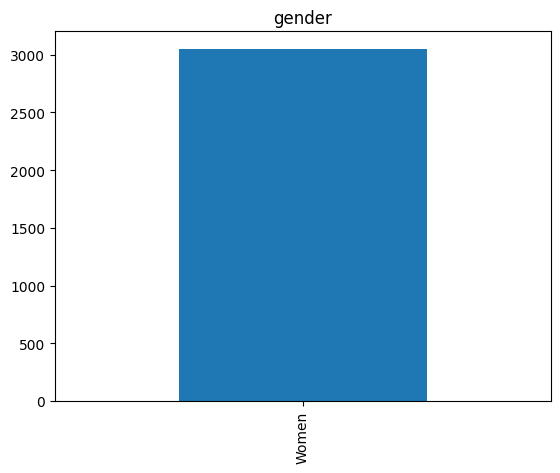

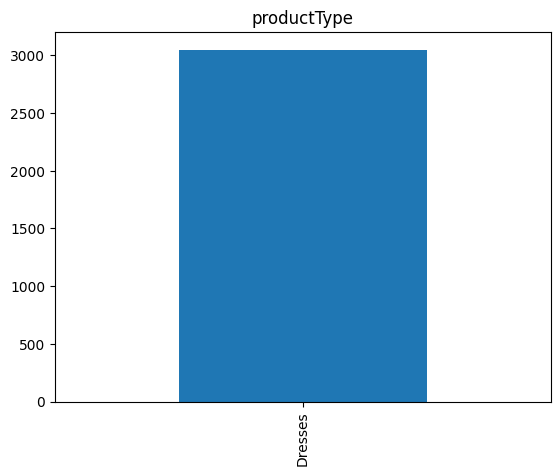

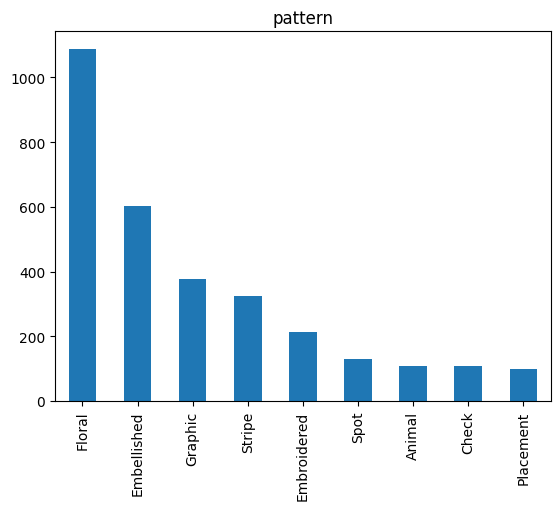

In [14]:
for col in ["gender", "productType", "pattern"]:
    train[col].value_counts().plot(kind='bar', title=col)
    plt.show()

- productType and gender are confined to a single category, meaning that these won't be particularly useful features 
to train on
- patterns aren't evenly distributed meaning some categories will be over / under represented in our data - this can 
cause some issues due to class imbalance, but we can think about how to tackle those at a later point depending on 
performance. For example, we could use SMOTE to oversample from under-represented classes 
- Let's have a look at our test data to see if we have to deal with any out of distribution categories there

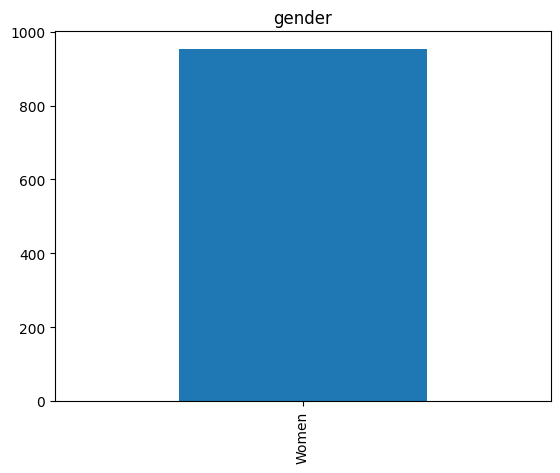

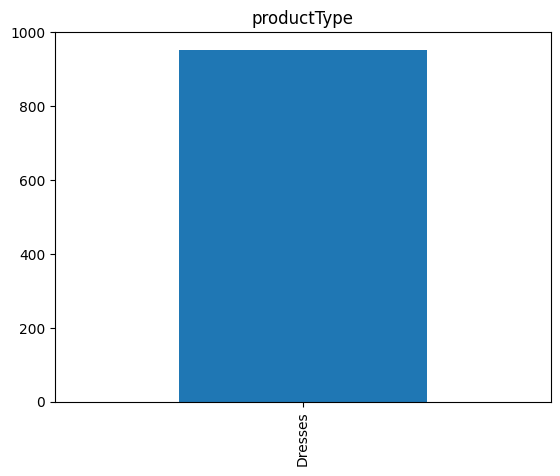

In [18]:
for col in ["gender", "productType"]:
    test[col].value_counts().plot(kind='bar', title=col)
    plt.show()

- Ok so no out of distribution categories in our test data. However, we should design our endpoint to gracefully handle 
such cases. We can go a few different ways with this, return:
    - an error response (refuse to serve requests for unseen data)
    - a fallback prediction (we can still rely on the rest of the metadata as input features to have our best guess 
    at it)
    - a warning response (potentially alongside a fallback prediction) this is a good middle ground as downstream 
    consumers can decide for themselves how to handle such cases, ie. trust the inference we provided or discard it
